<a href="https://colab.research.google.com/github/Vignesh424/Pokemon-Regression/blob/main/Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#read the data
dataset=pd.read_csv("/content/pokedex_(Update_05.20).csv")

In [ ]:
#data description
dataset.describe()

,Unnamed: 0,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,egg_type_number,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,924.000000,924.000000,924.000000,1028.000000,792.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,513.500000,437.711089,4.034047,1.527237,1.368093,69.753749,2.284047,437.571984,69.577821,80.119650,74.475681,72.732490,72.132296,68.534047,93.172078,64.139610,153.814935,1.271401,55.003157,30.316456,0.868434,1.125486,1.053502,1.034290,1.004134,1.196498,1.078794,0.952335,1.084630,1.166342,0.979329,0.992461,1.239786,1.010700,0.975681,1.065661,0.980302,1.084874
std,296.902341,259.366480,2.234937,0.499501,3.380126,129.221230,0.794981,121.664910,26.385849,32.372321,31.303309,32.677698,28.083684,29.802103,75.240630,21.455464,79.270628,0.451417,20.182675,28.942912,0.286236,0.717742,0.613411,0.645167,0.748527,0.759471,0.754969,0.542982,0.784937,0.593030,0.499146,0.598301,0.699156,0.558533,0.377549,0.451054,0.503434,0.527743
min,0.000000,1.000000,1.000000,1.000000,0.100000,0.100000,0.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,0.000000,36.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,256.750000,213.750000,2.000000,1.000000,0.600000,8.800000,2.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,70.000000,67.000000,1.000000,50.000000,20.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,513.500000,433.500000,4.000000,2.000000,1.000000,28.500000,2.000000,455.000000,66.500000,76.000000,70.000000,65.000000,70.000000,65.000000,60.000000,70.000000,159.000000,1.000000,50.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,770.250000,663.250000,6.000000,2.000000,1.500000,69.100000,3.000000,510.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,70.000000,201.500000,2.000000,50.000000,25.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.625000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1027.000000,890.000000,8.000000,2.000000,100.000000,999.900000,3.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,180.000000,255.000000,140.000000,608.000000,2.000000,100.000000,120.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


In [ ]:
#first 5 printing
dataset.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [ ]:
#delete column and save as a new 
pokedex=dataset.drop(['german_name', 'japanese_name'], axis=1)

In [ ]:
#print first 5 of new
pokedex.head()

,Unnamed: 0,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [ ]:
#new_data description
pokedex.describe()

,Unnamed: 0,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,egg_type_number,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,924.000000,924.000000,924.000000,1028.000000,792.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,513.500000,437.711089,4.034047,1.527237,1.368093,69.753749,2.284047,437.571984,69.577821,80.119650,74.475681,72.732490,72.132296,68.534047,93.172078,64.139610,153.814935,1.271401,55.003157,30.316456,0.868434,1.125486,1.053502,1.034290,1.004134,1.196498,1.078794,0.952335,1.084630,1.166342,0.979329,0.992461,1.239786,1.010700,0.975681,1.065661,0.980302,1.084874
std,296.902341,259.366480,2.234937,0.499501,3.380126,129.221230,0.794981,121.664910,26.385849,32.372321,31.303309,32.677698,28.083684,29.802103,75.240630,21.455464,79.270628,0.451417,20.182675,28.942912,0.286236,0.717742,0.613411,0.645167,0.748527,0.759471,0.754969,0.542982,0.784937,0.593030,0.499146,0.598301,0.699156,0.558533,0.377549,0.451054,0.503434,0.527743
min,0.000000,1.000000,1.000000,1.000000,0.100000,0.100000,0.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,0.000000,36.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,256.750000,213.750000,2.000000,1.000000,0.600000,8.800000,2.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,70.000000,67.000000,1.000000,50.000000,20.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,513.500000,433.500000,4.000000,2.000000,1.000000,28.500000,2.000000,455.000000,66.500000,76.000000,70.000000,65.000000,70.000000,65.000000,60.000000,70.000000,159.000000,1.000000,50.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,770.250000,663.250000,6.000000,2.000000,1.500000,69.100000,3.000000,510.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,70.000000,201.500000,2.000000,50.000000,25.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.625000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1027.000000,890.000000,8.000000,2.000000,100.000000,999.900000,3.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,180.000000,255.000000,140.000000,608.000000,2.000000,100.000000,120.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


In [ ]:

# Return the dtypes in the DataFrame.
pokedex.dtypes

Unnamed: 0            int64
pokedex_number        int64
name                 object
generation            int64
status               object
species              object
type_number           int64
type_1               object
type_2               object
height_m            float64
weight_kg           float64
abilities_number      int64
ability_1            object
ability_2            object
ability_hidden       object
total_points        float64
hp                  float64
attack              float64
defense             float64
sp_attack           float64
sp_defense          float64
speed               float64
catch_rate          float64
base_friendship     float64
base_experience     float64
growth_rate          object
egg_type_number       int64
egg_type_1           object
egg_type_2           object
percentage_male     float64
egg_cycles          float64
against_normal      float64
against_fire        float64
against_water       float64
against_electric    float64
against_grass       

**1.** **What are the different pokemons across generations?**

We'll start by taking a look at the total number of Pokemon in each generation.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


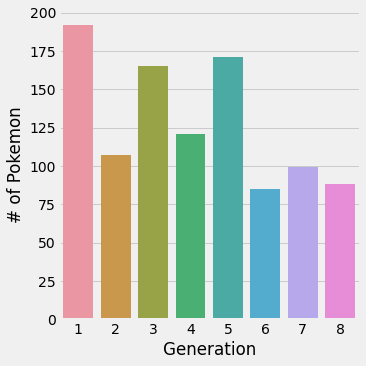

In [ ]:
sns.factorplot(
    x='generation', 
    data=pokedex, 
    kind='count'
).set_axis_labels('Generation', '# of Pokemon');

There doesn't seem to be a trend across generations; however, even-numbered generations introduced fewer Pokemon as compared to the odd-numbered generations.

Let's dig a bit deeper and examine the distribution of primary and secondary types of Pokemon across generations.

2. **Using a Trellis chart, We find distribution of primary and secondary types of Pokemon across generations.**



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


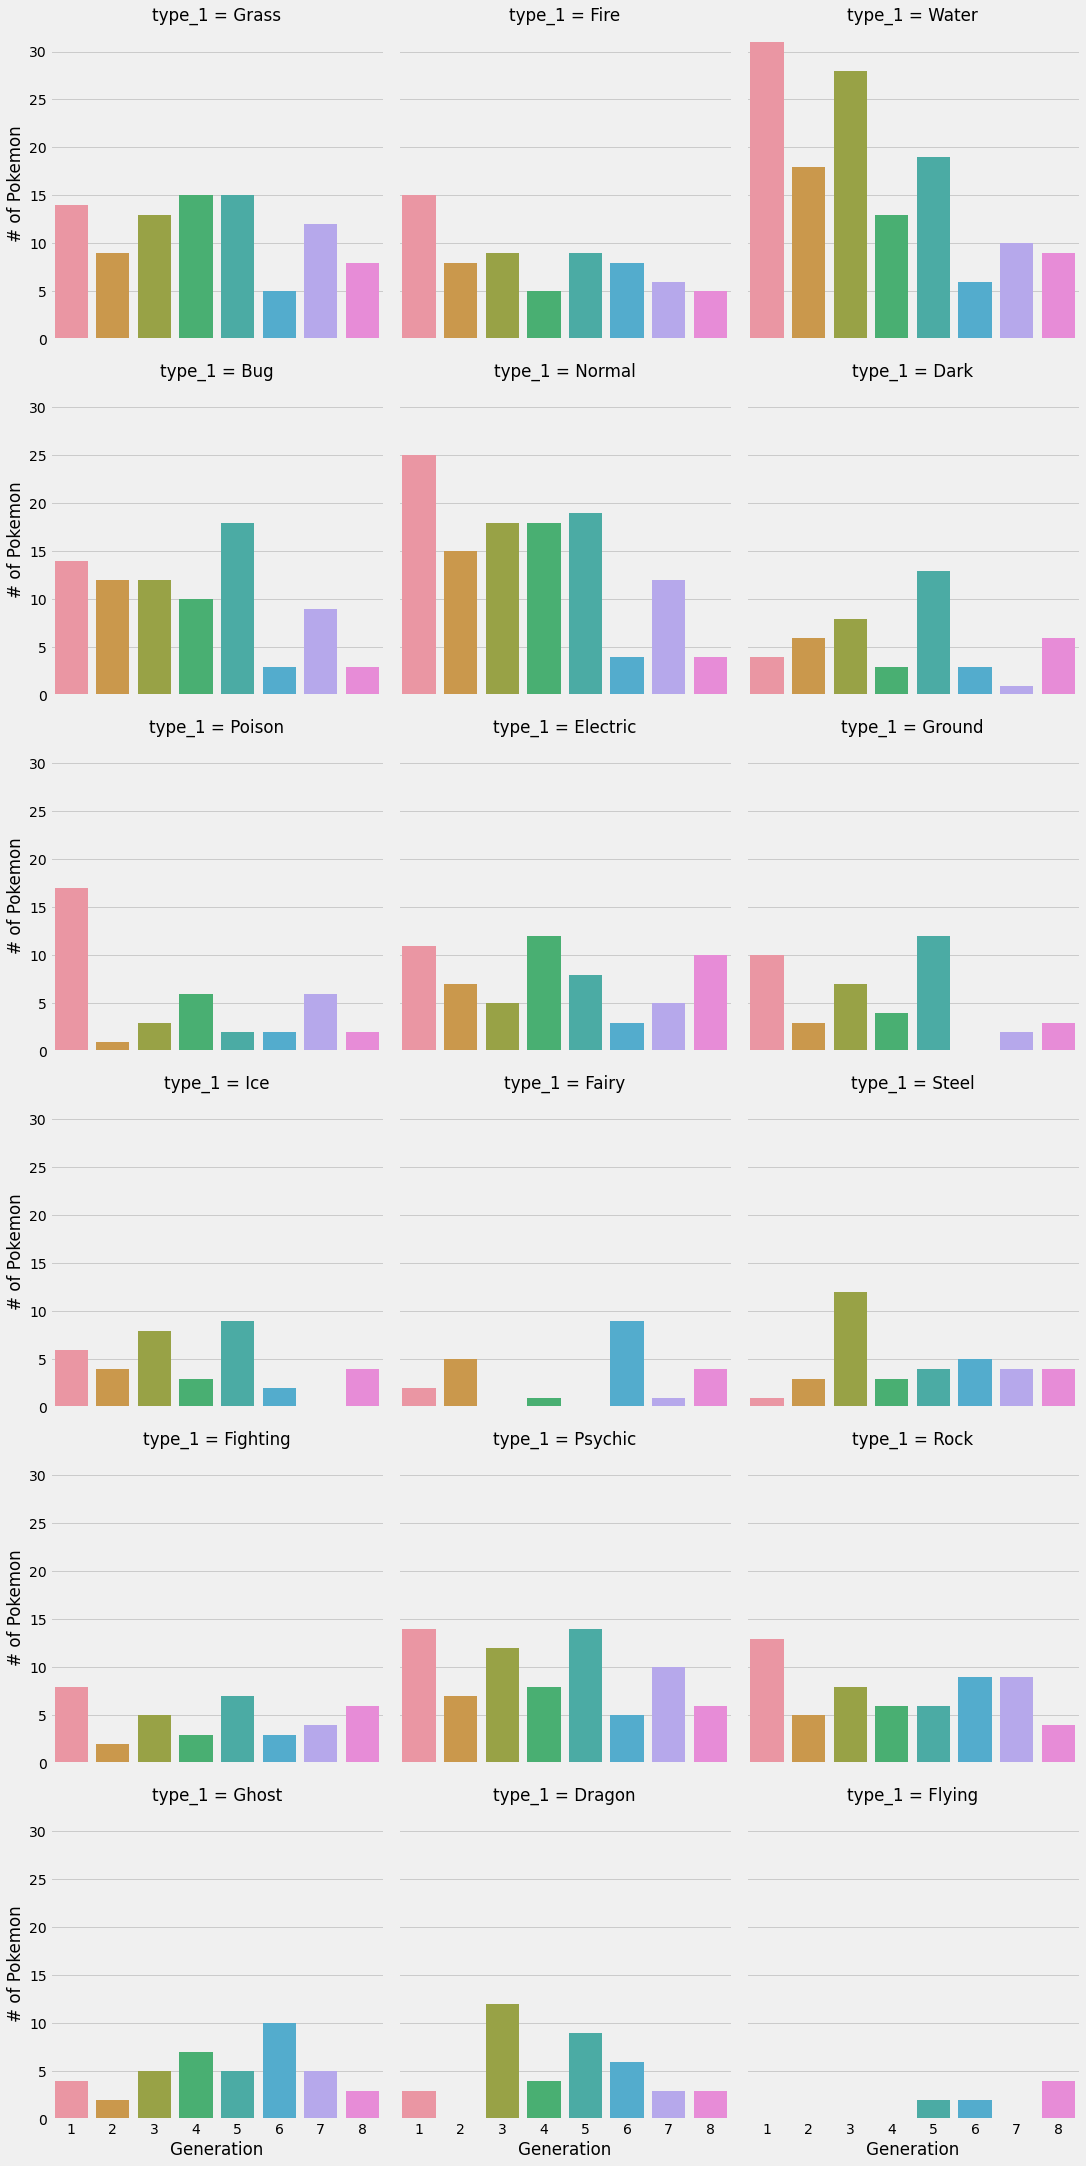

In [ ]:
sns.factorplot(
    x='generation',
    data=pokedex,
    col='type_1',
    kind='count',
    col_wrap=3
).set_axis_labels('Generation', '# of Pokemon');


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


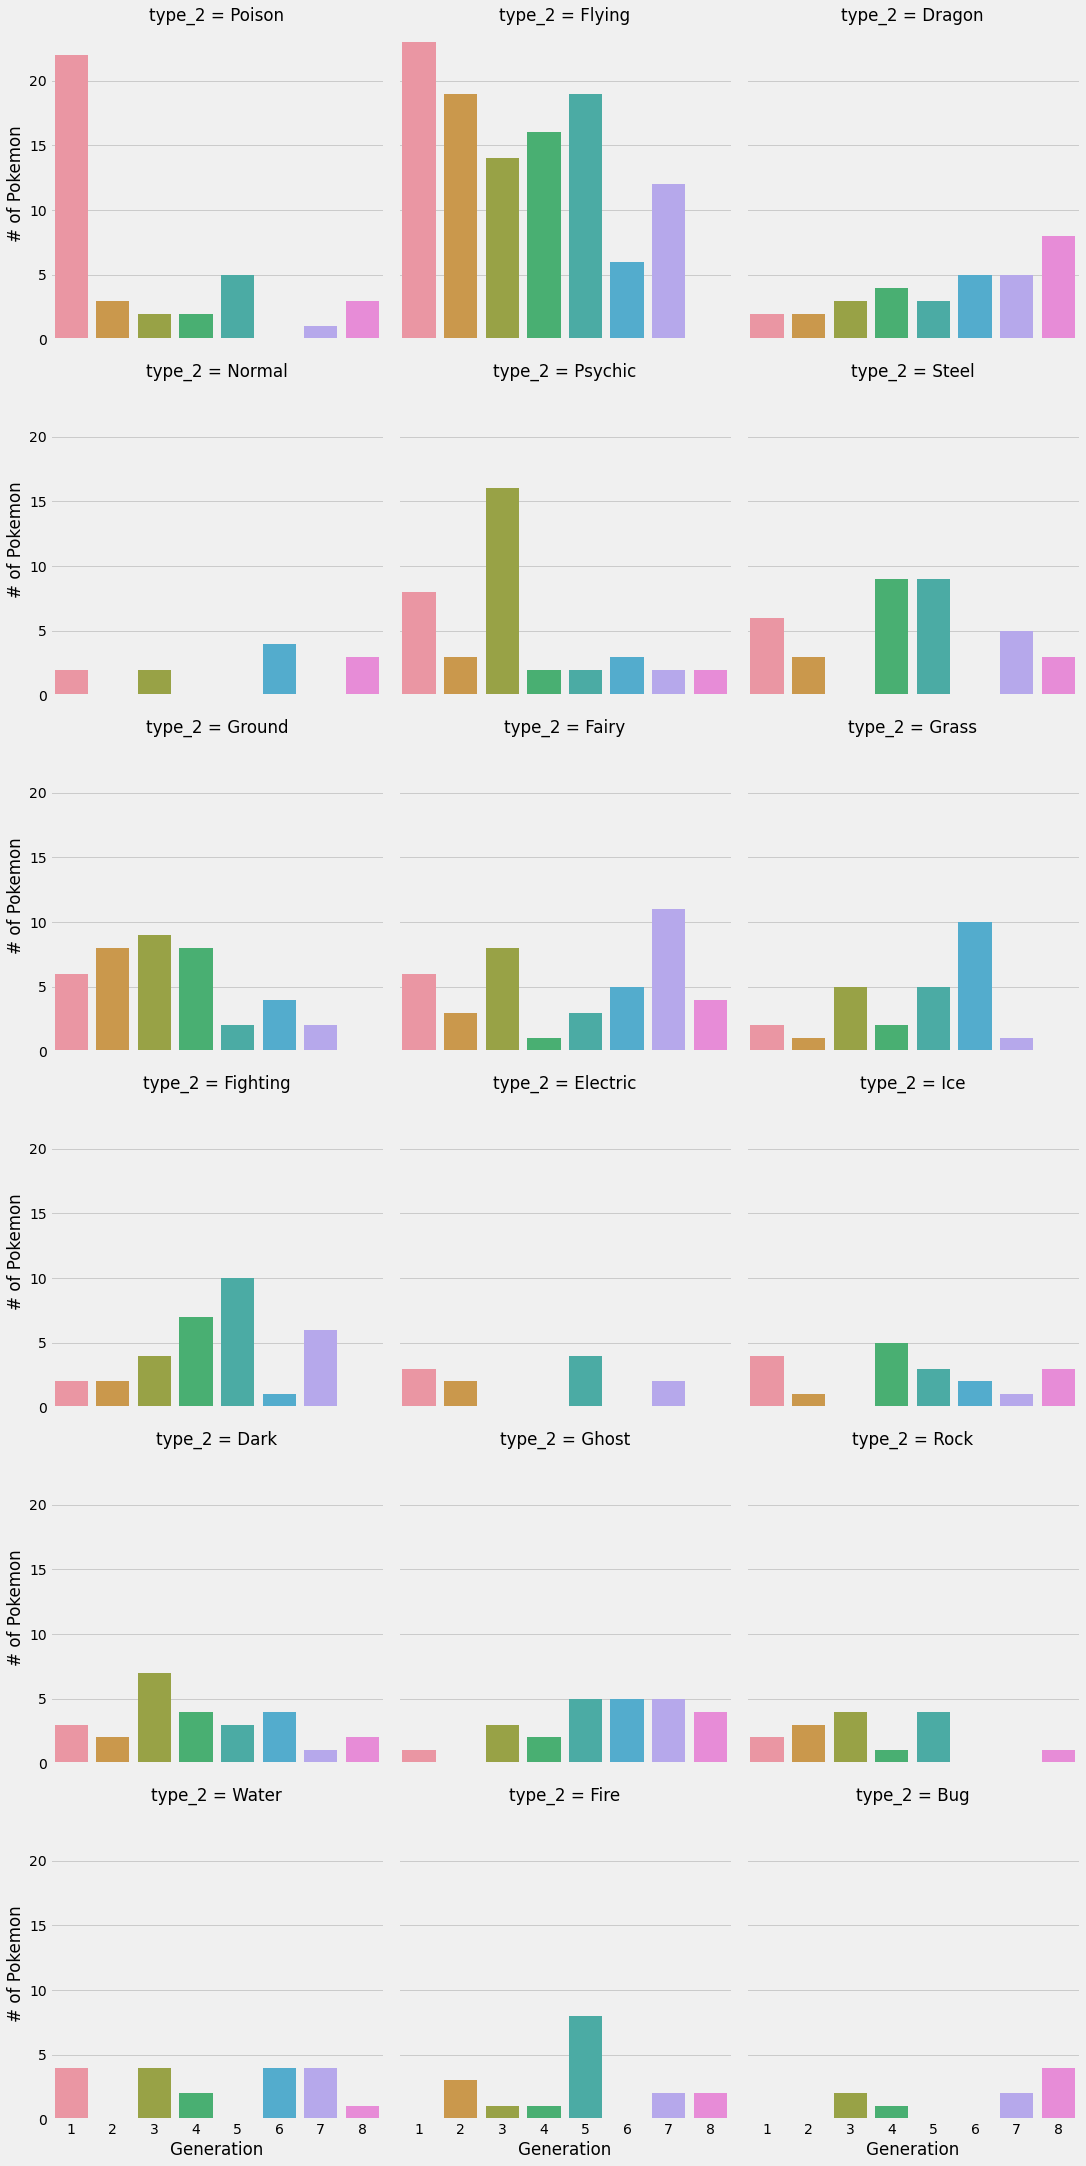

In [ ]:
sns.factorplot(
    x='generation',
    data=pokedex,
    col='type_2',
    kind='count',
    col_wrap=3
).set_axis_labels('Generation', '# of Pokemon');


3. **Finding Pokemon Types**

In [ ]:
type_1= pokedex['type_1'].unique()
print(type_1)
type_2= pokedex['type_2'].unique()
print(type_2)
print('Type 1 count: {}'.format(len(type_1)))  #nunique()
print('Type 2 count: {}'.format(len(type_2)))

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Dark' 'Poison' 'Electric' 'Ground'
 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Dragon'
 'Flying']
['Poison' nan 'Flying' 'Dragon' 'Normal' 'Psychic' 'Steel' 'Ground'
 'Fairy' 'Grass' 'Fighting' 'Electric' 'Ice' 'Dark' 'Ghost' 'Rock' 'Water'
 'Fire' 'Bug']
Type 1 count: 18
Type 2 count: 19


There are a total of 18 primary types and 19 secondary types (again, the additional secondary type refers to Pokemon species without a secondary type).

We will create custom color palettes to indicate the types easily.

4. **Determining the most common primary and secondary type distributions.** 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


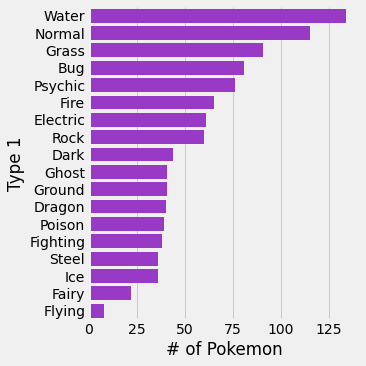

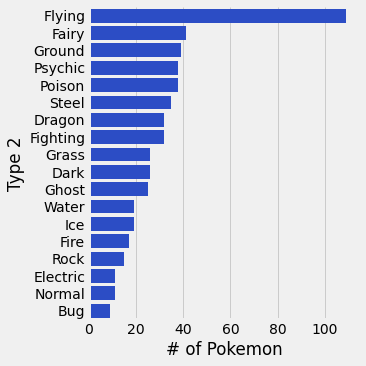

In [ ]:
sns.factorplot(
    y='type_1',
    data=pokedex,
    kind='count',
    order=pokedex['type_1'].value_counts().index,
    aspect=1,
    color= '#a123de'
).set_axis_labels('# of Pokemon', 'Type 1')

sns.factorplot(
    y='type_2',
    data=pokedex,
    kind='count',
    order=pokedex['type_2'].value_counts().index,
    aspect=1,
    color='#123edf'
).set_axis_labels('# of Pokemon', 'Type 2');

5. **What are the most common combinations of primary and secondary type of pokemon?**

For finding the combinations, we need Type 2 also. So, we will select those cells in Type 2 not equal to None and create a heatmap.

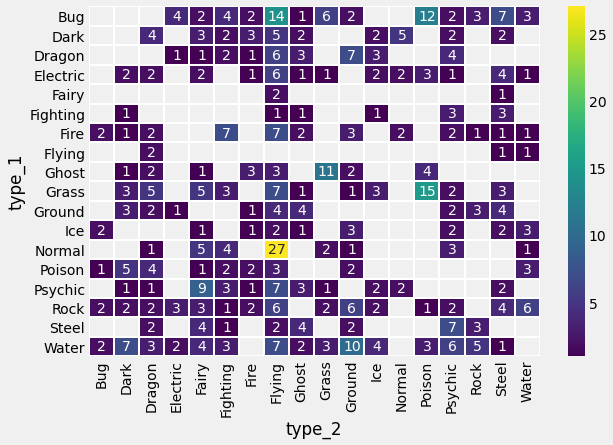

In [ ]:
most_common = pokedex[pokedex['type_2'] != 'NaN']
dims = (9, 6) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(most_common.groupby(['type_1', 'type_2']).size().unstack(),linewidths=1,annot=True, cmap='viridis');

6. **Examining the Base Stat Analysis Correlation.**

Using a Correlation Matrix, we will examine the correlation between the base stats of Pokemon.

[Text(0.5, 1.0, 'HeatMap to show Correlation between Base Stats')]

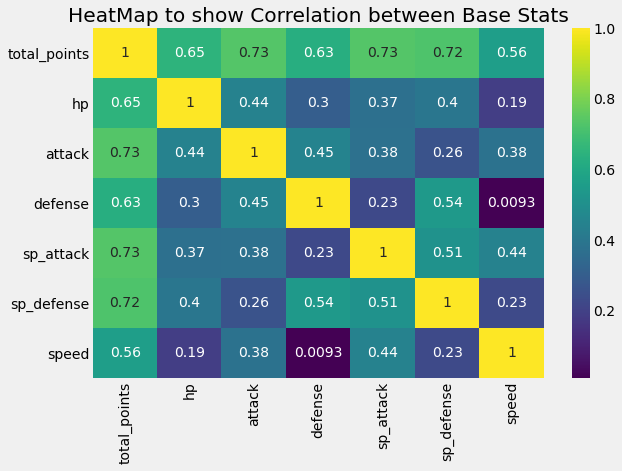

In [ ]:
Corr = pokedex[['total_points' ,'hp', 'attack','defense','sp_attack','sp_defense','speed']]
dims = (9, 6) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
CorrelationMap = sns.heatmap(Corr.corr(),annot = True, cmap='viridis')
CorrelationMap.set(title = 'HeatMap to show Correlation between Base Stats')

We can see that the correlation between attack and total_points is 0.73. So we will use 2D scatterplot also called as the lmplot to see the correlation between total_points and attack.

6. **Regression analysis of Total_Points and Defense**

Text(-1.664999999999992, 0.5, 'Attack')

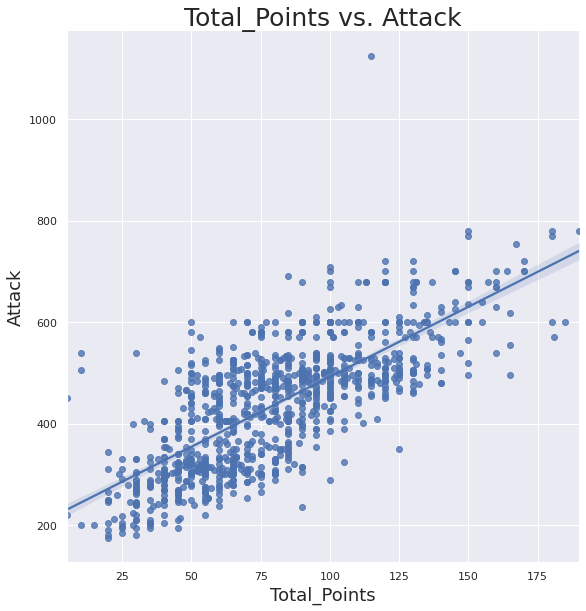

In [ ]:
#Plot the graph
sns.set()
scatter = sns.lmplot(x='attack', y='total_points',data=pokedex,
                   fit_reg = True, height = 8, aspect = 1)
plt.title('Total_Points vs. Attack',fontsize = 25)
plt.xlabel('Total_Points',fontsize = 18)
plt.ylabel('Attack',fontsize = 18)

7. **Distributions Analysis on Attack and Defence.**

For distributions, we use Histograms. Here, to compare it with 2 variables, we used stacked dual axis histograms with kde to see the skeweness.

[Text(0.5, 0, 'Defense:y , Attack:b'),
 Text(0.5, 1.0, 'Distribution of Defense and Attack')]

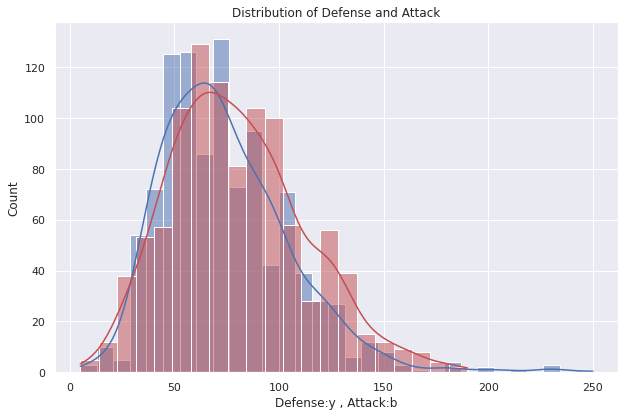

In [ ]:
dims = (9,6)
fig, ax = plt.subplots(figsize=dims)
Dhist = sns.histplot(pokedex['defense'],color='b',kde=True)
Ahist = sns.histplot(pokedex['attack'],color = 'r',kde=True)
Ahist.set(title = 'Distribution of Defense and Attack', xlabel = 'Defense:y , Attack:b')

Conclusion: Here, the distribution of both attributes are also similar. Also a positive skew is seen. We can see that there is a significant tail end to the Defense stat as opposed to the Attack stat, portraying that the Defense stat has more Pokemon with high Defense stats than Attack. You could argue that the Defense stat has a higher variance than the Attack stat.

**What the top 10 pokemons?**

In [ ]:
top_pokemon = pokedex.sort_values('total_points', ascending=False).head(10)
top_pokemon

,Unnamed: 0,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1027,1027,890,Eternatus Eternamax,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,100.0,NaN,0,NaN,NaN,NaN,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0
190,190,150,Mega Mewtwo Y,1,Legendary,Genetic Pokémon,1,Psychic,NaN,1.5,33.0,1,Insomnia,NaN,NaN,780.0,106.0,150.0,70.0,194.0,120.0,140.0,3.0,0.0,351.0,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.00,1.0,0.5,1.0,1.0,1.0,0.5,2.00,1.00,2.0,1.0,2.0,1.0,1.0
189,189,150,Mega Mewtwo X,1,Legendary,Genetic Pokémon,2,Psychic,Fighting,2.3,127.0,1,Steadfast,NaN,NaN,780.0,106.0,190.0,100.0,154.0,100.0,130.0,3.0,0.0,351.0,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.00,1.0,0.5,1.0,1.0,2.0,1.0,1.00,0.50,2.0,1.0,1.0,1.0,2.0
458,458,384,Mega Rayquaza,3,Legendary,Sky High Pokémon,2,Dragon,Flying,10.8,392.0,1,Delta Stream,NaN,NaN,780.0,105.0,180.0,100.0,180.0,100.0,115.0,3.0,0.0,351.0,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,1.0,0.0,1.0,1.0,0.50,1.00,1.0,2.0,1.0,1.0,2.0
456,456,383,Primal Groudon,3,Legendary,Continent Pokémon,2,Ground,Fire,5.0,999.7,1,Desolate Land,NaN,NaN,770.0,100.0,180.0,160.0,150.0,90.0,90.0,5.0,0.0,347.0,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.0,0.0,1.00,1.0,1.0,0.5,2.0,1.0,1.0,0.50,1.00,1.0,1.0,1.0,0.5,0.5
454,454,382,Primal Kyogre,3,Legendary,Sea Basin Pokémon,1,Water,NaN,9.8,430.0,1,Primordial Sea,NaN,NaN,770.0,100.0,150.0,90.0,180.0,160.0,90.0,5.0,0.0,347.0,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.0,0.5,2.0,2.00,0.5,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0,0.5,1.0
930,930,800,Ultra Necrozma,7,Legendary,Prism Pokémon,2,Psychic,Dragon,7.5,230.0,1,Neuroforce,NaN,NaN,754.0,97.0,167.0,97.0,167.0,97.0,129.0,3.0,0.0,339.0,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.50,2.0,0.5,1.0,1.0,1.0,0.5,2.00,1.00,2.0,2.0,2.0,1.0,2.0
1024,1024,889,Zamazenta Crowned Shield,8,Legendary,Warrior Pokémon,2,Fighting,Steel,2.9,785.0,1,Dauntless Shield,NaN,NaN,720.0,92.0,130.0,145.0,80.0,145.0,128.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,0.5,2.0,1.0,1.0,0.50,0.5,2.0,0.0,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
584,584,493,Arceus,4,Mythical,Alpha Pokémon,1,Normal,NaN,3.2,320.0,1,Multitype,NaN,NaN,720.0,120.0,120.0,120.0,120.0,120.0,120.0,3.0,0.0,324.0,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.00,1.0,2.0,1.0,1.0,1.0,1.0,1.00,1.00,0.0,1.0,1.0,1.0,1.0
1022,1022,888,Zacian Crowned Sword,8,Legendary,Warrior Pokémon,2,Fairy,Steel,2.8,355.0,1,Intrepid Sword,NaN,NaN,720.0,92.0,170.0,115.0,80.0,115.0,148.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,0.5,2.0,1.0,1.0,0.50,0.5,1.0,0.0,2.0,0.5,0.5,0.25,0.50,1.0,0.0,0.5,1.0,0.5


9. **Find the legendary and mythical count from the top pokemon**

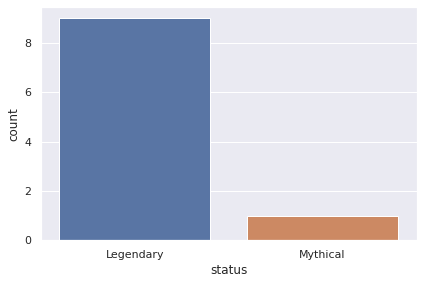

In [ ]:
sns.countplot(x='status', data=top_pokemon);

10. **Finding the Strongest Pokemon with Primary and Secondary types.**

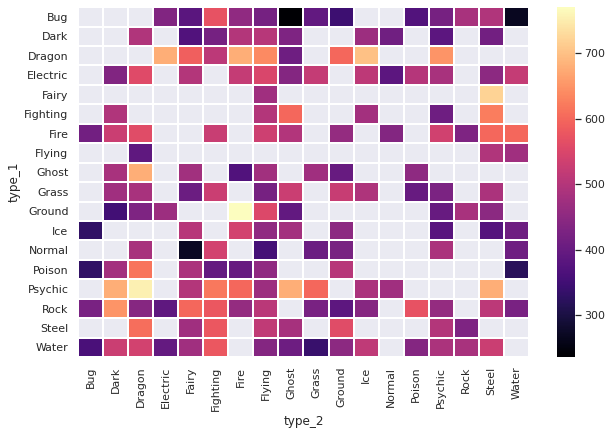

In [ ]:
dims = (9, 6) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
medians = pokedex.groupby(['type_1', 'type_2']).median().unstack().loc[:, 'total_points']
sns.heatmap(medians, linewidths=1, cmap='magma');

We come to a conclusion that Dragon pokemons are really good. They are strong.

Training and Testing

In [ ]:
X=pokedex.iloc[:,15:16].values
y=pokedex.iloc[:,17:18].values

In [ ]:
X

array([[ 318.],
       [ 405.],
       [ 525.],
       ...,
       [ 670.],
       [ 690.],
       [1125.]])

In [ ]:
y

array([[ 49.],
       [ 62.],
       [ 82.],
       ...,
       [130.],
       [ 85.],
       [115.]])

In [ ]:
#import packages for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X_train, y_train)

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

[-5.40155254]
[[0.19442057]]


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame.from_records([{ 'Actual':y_test,'Predicted':y_pred }])
print(df)

                                              Actual                                          Predicted
0  [[68.0], [70.0], [53.0], [102.0], [45.0], [76....  [[84.03190863172283], [90.8366285032729], [54....


In [ ]:
from sklearn import metrics
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17.181390898826955
Mean Squared Error: 464.71375809134736
Root Mean Squared Error: 21.55722055579864
